Bir desenden 4 farklı benzeri oluşturuldu, bu desenler uç uca eklenerek birleştirildi. Ardından inpaint ile araları onarıldı.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline, DPMSolverMultistepScheduler, StableDiffusionImg2ImgPipeline

In [ ]:
imagine_pipe = StableDiffusionImg2ImgPipeline.from_pretrained("/home/sd_models/deliberate_v2", safety_checker=None)
imagine_pipe.scheduler = DPMSolverMultistepScheduler.from_config(imagine_pipe.scheduler.config)
imagine_pipe.to("cuda",torch.float16)
seed = np.random.randint(0, np.iinfo(np.int64).max)
generator = torch.Generator().manual_seed(seed)
prompt = "colorful beautiful flowers on white background, wallpaper"
strength = 0.6
num_inference_steps = 25

# Load image
image = Image.open("../media/input_images/1041.png").convert("RGB")
image = image.resize((512, 512), Image.BICUBIC)

# show image
plt.imshow(image)

In [ ]:
# Run inference
image = imagine_pipe(
    image=image,
    prompt=prompt,
    strength=strength,
    num_inference_steps=num_inference_steps,
    generator=generator,
    num_images_per_prompt = 4
).images

for i in range(len(image)):
    image[i].save(f"../media/input_images/1041_{i}.png")


# convert to numpy
np_input_1 = np.array(image[0])
np_input_2 = np.array(image[1])
np_input_3 = np.array(image[2])
np_input_4 = np.array(image[3])

# plot
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(np_input_1)
axs[1].imshow(np_input_2)
axs[2].imshow(np_input_3)
axs[3].imshow(np_input_4)

In [ ]:
# add 4 images under each other
np_input = np.concatenate((np_input_1, np_input_2, np_input_3, np_input_4), axis=0)

# show image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np_input)

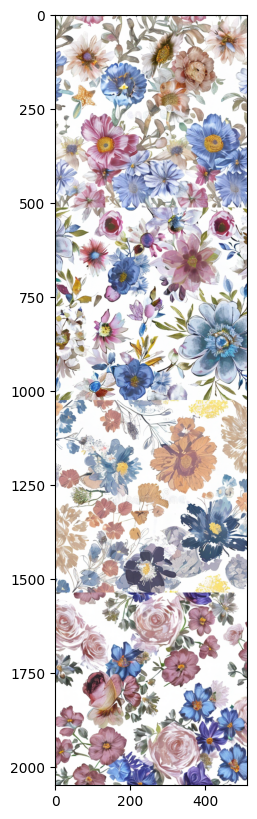

In [2]:
input_1 = Image.open("../media/input_images/11.png").convert("RGB")
input_1.thumbnail((512, 512))
input_2 = Image.open("../media/input_images/22.png").convert("RGB")
input_2.thumbnail((512, 512))
input_3 = Image.open("../media/input_images/33.png").convert("RGB")
input_3.thumbnail((512, 512))
input_4 = Image.open("../media/input_images/44.png").convert("RGB")
input_4.thumbnail((512, 512))

np_input_1 = np.array(input_1)
np_input_2 = np.array(input_2)
np_input_3 = np.array(input_3)
np_input_4 = np.array(input_4)

# add 4 images under each other
np_input = np.concatenate((np_input_1, np_input_2, np_input_3, np_input_4), axis=0)

# show image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np_input)

Max 255 Min 0


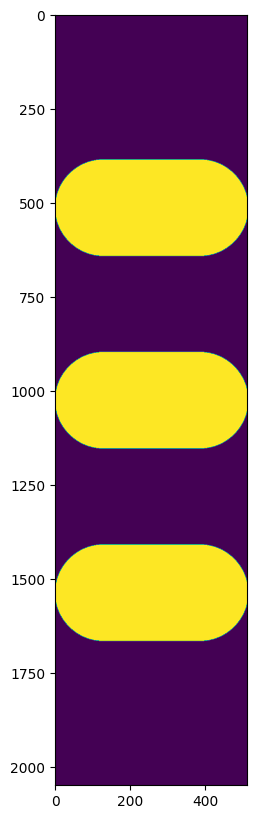

In [9]:
# mask a 256 pixel wide area up and down from the intersections
mask = np.zeros(np_input.shape[:2], dtype=np.uint8)
mask = Image.fromarray(mask)
draw = ImageDraw.Draw(mask)
left1 = 0
top1 = np_input_1.shape[0] - 128
right1 = np_input.shape[1]
bottom1 = np_input_1.shape[0] + 128

left2 = 0
top2 = np_input_1.shape[0] + np_input_2.shape[0] + np_input_3.shape[0] - 128
right2 = np_input.shape[1]
bottom2 = np_input_1.shape[0] + np_input_2.shape[0] + np_input_3.shape[0] + 128

left3 = 0
top3 = np_input_1.shape[0] + np_input_2.shape[0] - 128
right3 = np_input.shape[1]
bottom3 = np_input_1.shape[0] + np_input_2.shape[0] + 128

draw.rounded_rectangle((left1, top1, right1, bottom1),
                                        outline=None,
                                        radius=150,
                                        fill='white'
                                        )
draw.rounded_rectangle((left2, top2, right2, bottom2),
                                        outline=None,
                                        radius=150,
                                        fill='white'
                                        )
draw.rounded_rectangle((left3, top3, right3, bottom3),
                                        outline=None,
                                        radius=150,
                                        fill='white'
                                        )

                                        
""" mask[top1:bottom1, left1:right1] = 1
mask[top2:bottom2, left2:right2] = 1
mask[top3:bottom3, left3:right3] = 1 """

# show mask
print("Max", np.max(mask), "Min", np.min(mask))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)

100%|██████████| 24/24 [00:04<00:00,  5.53it/s]


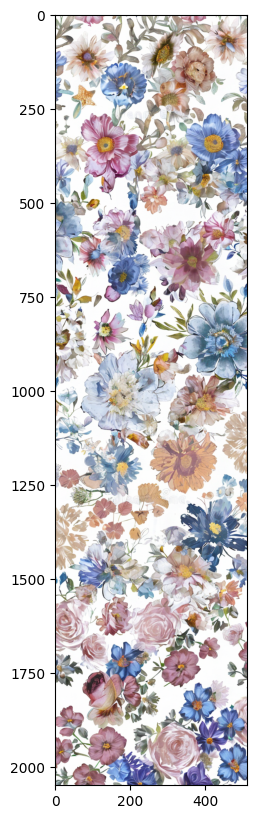

In [10]:
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda", torch.float16)

generator = torch.Generator().manual_seed(42)
prompt = "big and beautiful flowers on white background, wallpaper"
strength = 0.99
num_inference_steps = 25

# run inference
out = pipe(
    prompt=prompt,
    image=np_input,
    mask_image=mask,
    strength=strength,
    width=np_input.shape[1],
    height=np_input.shape[0],
    num_inference_steps=num_inference_steps,
    generator=generator).images[0]

# show result
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(out)


In [11]:
out.save("../media/output_images/test8.png")